# Boston_Housing - Regression Analysis

## Import TensorFlow

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.11.0'

* GPU 설정 OFF

In [ ]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [ ]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data
 * Preprocessing(Standardization)은 전체 데이터 기준으로 먼저 진행 후, train/test split를 방법이 있고, <br>
 * split 된 상태에서 전처리를 하는 방법이 있다. <br>
  이때, 실제 통계학에서는 동일한 통계량을 적용해야 오차가 적어진다고 하여, <br> train data의 표준편차와 평균을 test데이터에 동일하게 적용한다. <br>

In [ ]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [ ]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [ ]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 8분

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 5s 11ms/step - loss: 194.1059 - mae: 10.4887 - val_loss: 63.6694 - val_mae: 4.8795
Epoch 2/500
323/323 [==============================] - 2s 7ms/step - loss: 30.8672 - mae: 3.8669 - val_loss: 30.7726 - val_mae: 3.1244
Epoch 3/500
323/323 [==============================] - 2s 7ms/step - loss: 19.7212 - mae: 3.0746 - val_loss: 23.4414 - val_mae: 2.7779
Epoch 4/500
323/323 [==============================] - 3s 8ms/step - loss: 16.6433 - mae: 2.6905 - val_loss: 23.2084 - val_mae: 2.7541
Epoch 5/500
323/323 [==============================] - 2s 8ms/step - loss: 14.1551 - mae: 2.5973 - val_loss: 21.6331 - val_mae: 2.6513
Epoch 6/500
323/323 [==============================] - 1s 3ms/step - loss: 12.6199 - mae: 2.4165 - val_loss: 19.9470 - val_mae: 2.5773
Epoch 7/500
323/323 [==============================] - 1s 3ms/step - loss: 12.6735 - mae: 2.3259 - val_loss: 16.7179 - val_mae: 2.4615
Epoch 8/500
323/323 [==============================]

> ## 4) 학습 결과 시각화

* 전체 시각화

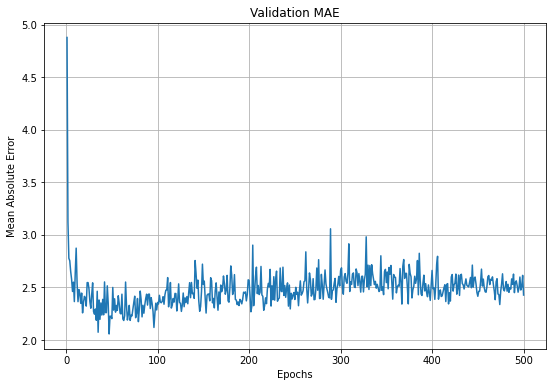

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

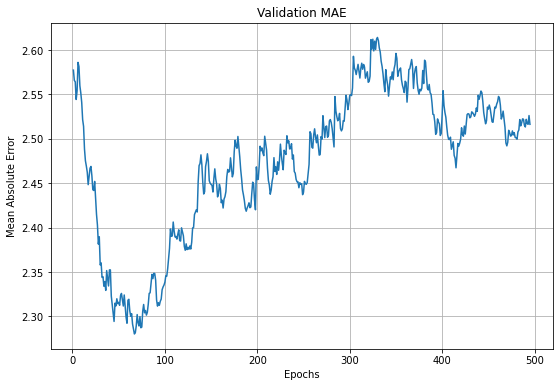

In [ ]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 13.8495 - mae: 2.3864
MAE is : 2.3864049911499023


> ## 6) Keras Session Clear

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

# IV. Callbacks( )

> ## 1) Model Define & Compile

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )
* 학습을 끝내는 시점을 찾아줌
* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수
  - Patience = 50 <BR>
 ```의미 : 가장 마지막 최소값을 가진 지점 기준으로, 최소점이 50번 연속적으로 더이상 업데이트 되지 않을 때 학습을 조기종료시킴```


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( )
* EarlyStopping이 찾은 최소점에서의 모델의 w,b을 저장해줌
* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', 
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
295/323 [==========================>...] - ETA: 0s - loss: 214.0487 - mae: 10.9734
Epoch 1: val_mae improved from inf to 4.04711, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 204.6215 - mae: 10.6186 - val_loss: 48.4889 - val_mae: 4.0471
Epoch 2/500
311/323 [===========================>..] - ETA: 0s - loss: 25.2257 - mae: 3.5469
Epoch 2: val_mae improved from 4.04711 to 3.03827, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 25.0569 - mae: 3.5616 - val_loss: 30.8058 - val_mae: 3.0383
Epoch 3/500
308/323 [===========================>..] - ETA: 0s - loss: 20.0015 - mae: 3.0886
Epoch 3: val_mae improved from 3.03827 to 2.80522, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 19.4836 - mae: 3.0563 - val_loss: 25.8018 - val_mae: 2.8052
Epoch 4/500
310/323 [===========================>..] - ETA: 0s - loss: 16.6084 - mae: 2.7011
Epoch 4: val_

> ## 5) Best Model

In [ ]:
!ls -l

total 72
-rw-r--r-- 1 root root 65840 Mar 25 01:33 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar 23 18:57 sample_data


> ## 6) Model Evaluate

In [ ]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')

In [ ]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test, verbose = 0)

print('MAE is :',test_mae_score)

MAE is : 2.505647659301758


# 
# 
# 
# The End
# 
# 
# 